In [1]:
import torch
import torchvision
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

In [3]:
print("CUDA is available:", torch.cuda.is_available())
print("PyTorch Version: ", torch.__version__)
print("Torchvision Version: ", torchvision.__version__)

CUDA is available: True
PyTorch Version:  1.13.1+cu116
Torchvision Version:  0.14.1+cu116


In [4]:
# import library which can handle video and extract frames
import cv2
import numpy as np
calibration_path = 'Videos/MVI_6477.MP4'
cap = cv2.VideoCapture(calibration_path)
frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)
cap.release()
frames = np.array(frames)
print(frames.shape)

(158, 1080, 1920, 3)


In [5]:

image = cv2.cvtColor(frames[0][:,:,:], cv2.COLOR_BGR2RGB)

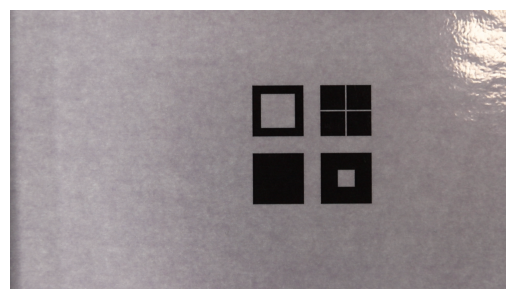

In [6]:
plt.figure()
plt.imshow(image)
plt.axis('off')
plt.show()

In [16]:
sam_checkpoint = "../Model/sam_vit_l_0b3195.pth"
model_type = "vit_l"

In [19]:
device = "cuda"

In [20]:
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam = sam.to(device)

mask_generator_ = SamAutomaticMaskGenerator(model=sam, 
                                           points_per_side=32,
                                           pred_iou_thresh=0.9,
                                           stability_score_thresh=0.96,
                                           crop_n_layers=1,
                                           crop_n_points_downscale_factor=2,
                                           min_mask_region_area=100,
                                           )

In [23]:
masks = mask_generator_.generate(image)

In [26]:
def show_anns(anns):
    if len(anns) == 0:
        return
    #sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse = True)
    sorted_anns = anns
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for index, ann in enumerate(sorted_anns):
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m * 0.35)))
        # Add 'i' at the top right of the box
        x1, y1, w, h = ann['bbox']
        ax.text(x1+5*index, y1, str(index), fontsize=12, ha='left', color='yellow')
        

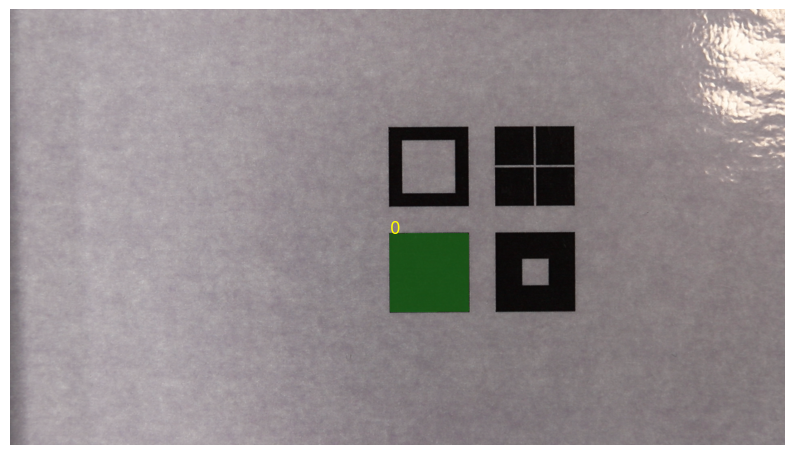

In [31]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
show_anns(masks[9:10])
plt.axis('off')
plt.show()

In [32]:
ratio = math.sqrt(masks[9]['area'])/15
print(f'{ratio:.4f} pixels is 1mm')

13.0643 pixels is 1mm
